# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_6_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [2]:
# Import necessary libraries 🔧
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load your uploaded file (path "/content/listings.csv.gz") 🔧
df = pd.read_csv("/content/listings.csv.gz")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20250804133828,2025-08-04,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20250804133828,2025-08-04,city scrape,Funky Urban Gem: Prime Central Location - Park...,Step into the charming and comfy 1BR/1BA apart...,Overview<br /><br />The lovely apartment is lo...,https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.81,4.77,NaN,f,4,4,0,0,2.32
2,5651579,https://www.airbnb.com/rooms/5651579,20250804133828,2025-08-04,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.88,4.76,4.64,NaN,f,2,1,1,0,2.97
3,6623339,https://www.airbnb.com/rooms/6623339,20250804133828,2025-08-04,city scrape,Bright & Cozy City Stay · Top Location + Parking!,Step into the charming and comfy 1BR/1BA apart...,Overview<br /><br />The lovely apartment is lo...,https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.70,4.80,4.72,NaN,f,4,4,0,0,2.68
4,9005989,https://www.airbnb.com/rooms/9005989,20250804133828,2025-08-04,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,17766924,...,4.93,4.87,4.77,NaN,f,1,1,0,0,5.67


## 2. Explore Missing Values

Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



id                                               0
listing_url                                      0
scrape_id                                        0
last_scraped                                     0
source                                           0
                                                ..
calculated_host_listings_count                   0
calculated_host_listings_count_entire_homes      0
calculated_host_listings_count_private_rooms     0
calculated_host_listings_count_shared_rooms      0
reviews_per_month                               68
Length: 79, dtype: int64


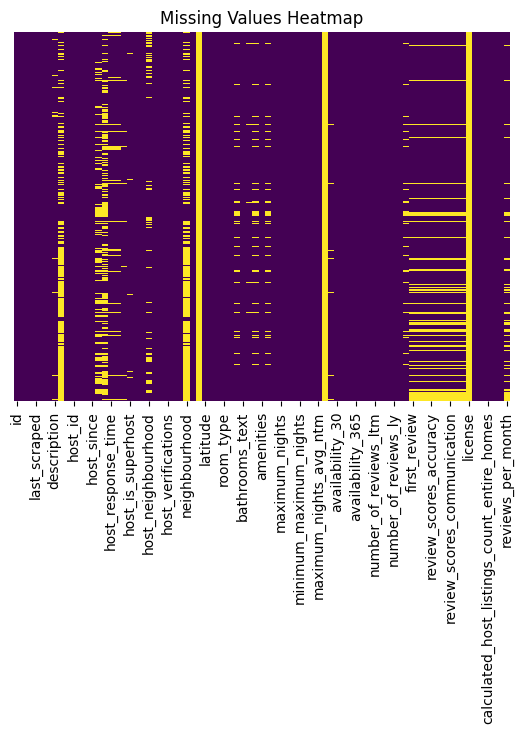


Percentage of missing values:
 id                                               0.000000
listing_url                                      0.000000
scrape_id                                        0.000000
last_scraped                                     0.000000
source                                           0.000000
                                                  ...    
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
calculated_host_listings_count_private_rooms     0.000000
calculated_host_listings_count_shared_rooms      0.000000
reviews_per_month                               14.814815
Length: 79, dtype: float64

Columns with too much missing data:
 neighborhood_overview            57.298475
host_about                       45.315904
neighbourhood                    57.298475
neighbourhood_group_cleansed    100.000000
calendar_updated                100.000000
license                         100.000000
dtype: 

In [11]:
null_counts = df.isnull().sum()
print(null_counts)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()
missing_percent = df.isnull().mean() * 100
print("\nPercentage of missing values:\n", missing_percent)
too_much_missing = missing_percent[missing_percent > 40]
print("\nColumns with too much missing data:\n", too_much_missing)

### ✍️ Your Response: 🔧
1. neighbourhood_group_cleansed, License, and calendar_updated

2. the ones that are most likely to create business problems are license, neighbourhood, and neighbourhood_overview

3. the ones that can be safely ignored or dropped are neighbourhood_group_cleansed, calendar_updated, and license.


## 3. Drop Columns That Aren’t Useful

Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [13]:
df = df.drop(columns=['neighbourhood_group_cleansed', 'calendar_updated', 'license'])
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20250804133828,2025-08-04,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.22,4.56,3.22,3.67,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20250804133828,2025-08-04,city scrape,Funky Urban Gem: Prime Central Location - Park...,Step into the charming and comfy 1BR/1BA apart...,Overview<br /><br />The lovely apartment is lo...,https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.85,4.81,4.81,4.77,f,4,4,0,0,2.32
2,5651579,https://www.airbnb.com/rooms/5651579,20250804133828,2025-08-04,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.81,4.88,4.76,4.64,f,2,1,1,0,2.97
3,6623339,https://www.airbnb.com/rooms/6623339,20250804133828,2025-08-04,city scrape,Bright & Cozy City Stay · Top Location + Parking!,Step into the charming and comfy 1BR/1BA apart...,Overview<br /><br />The lovely apartment is lo...,https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.83,4.70,4.80,4.72,f,4,4,0,0,2.68
4,9005989,https://www.airbnb.com/rooms/9005989,20250804133828,2025-08-04,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,17766924,...,4.95,4.93,4.87,4.77,f,1,1,0,0,5.67


### ✍️ Your Response: 🔧
1. the columns that i dropped are 'neighbourhood_group_cleansed', 'calendar_updated' and'license'

2. From a business perspective, the columns neighbourhood_group_cleansed, calendar_updated, and license do not provide useful value and can be safely removed. The neighbourhood_group_cleansed column is completely empty, meaning it cannot contribute to customer segmentation or market analysis. Similarly, calendar_updated contains no usable data and therefore cannot provide insight into host activity. Finally, the license field, while potentially important for regulatory purposes, is entirely missing in this dataset and cannot support compliance tracking or business decision-making. Removing these columns reduces noise and improves dataset quality.

3. some things that could go wrong if I left them in is wasted resources Models and analyses will still process these columns, even though they provide no value. This can slow down computation and clutter results. Misleading interpretation, someone reviewing your dataset later might assume these fields are meaningful and try to use them in analysis, which could lead to incorrect insights or wasted effort. Another thing is Model performance issues, empty or nearly empty columns can confuse machine learning algorithms, sometimes adding noise that reduces accuracy.



## 4. Fill or Fix Values in Key Columns

Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [14]:
# Fill missing values in 'reviews_per_month' with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Fill missing values in 'host_response_rate' with 'Unknown'
df['host_response_rate'] = df['host_response_rate'].fillna('Unknown')

# Display the first few rows to show changes
display(df[['reviews_per_month', 'host_response_rate']].head())

# Check null counts for the modified columns
print("\nNull counts after filling:")
print(df[['reviews_per_month', 'host_response_rate']].isnull().sum())

,reviews_per_month,host_response_rate
0,0.07,Unknown
1,2.32,100%
2,2.97,100%
3,2.68,100%
4,5.67,Unknown



Null counts after filling:
reviews_per_month     0
host_response_rate    0
dtype: int64


### ✍️ Your Response: 🔧
1. I cleaned the 'reviews_per_month' and 'host_response_rate' columns.
2. For 'reviews_per_month', I filled missing values with `0`. This is because a missing value likely indicates that the listing has not received any reviews yet, so `0` is a reasonable representation of the number of reviews per month. For 'host_response_rate', I filled missing values with the string 'Unknown'. Since we don't know the actual response rate, using 'Unknown' clearly indicates that the data was missing without making assumptions about the host's responsiveness.
3. The risk of filling 'reviews_per_month' with `0` is that it assumes no reviews have been given, which might not always be the case if the data collection process missed some reviews. Filling 'host_response_rate' with 'Unknown' avoids making assumptions, but it might make it harder to analyze host responsiveness using this column directly, as 'Unknown' is a categorical placeholder and not a numerical value.

## 5. Convert and Clean Data Types

Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 76, dtype: object


,price
count,419.000000
mean,118.119332
std,100.619541
min,24.000000
25%,70.500000
50%,95.000000
75%,127.000000
max,1050.000000


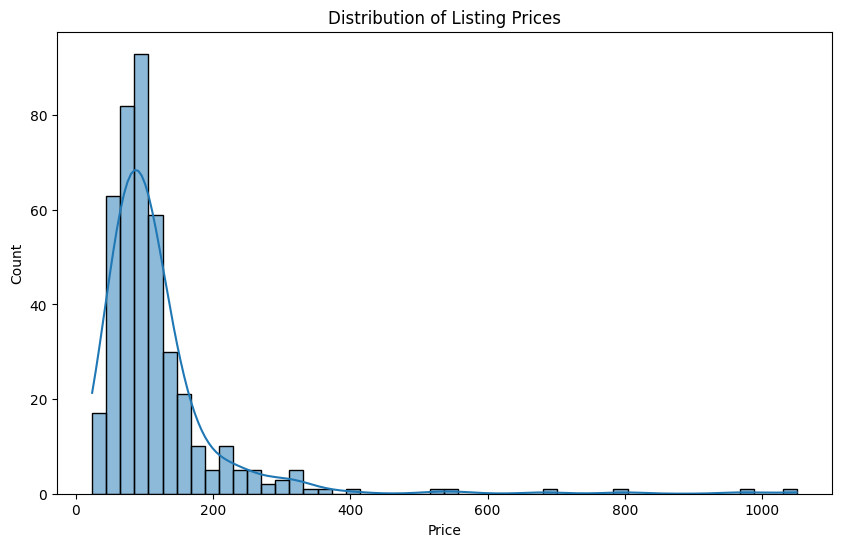

In [16]:
# Check data types of columns
print(df.dtypes)

# Identify the 'price' column as a string (object)
# Clean the 'price' column: remove '$' and ',' and convert to float
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Verify the conversion by summarizing the cleaned column
display(df['price'].describe())

# Optionally, create a histogram to visualize the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'].dropna(), bins=50, kde=True) # Drop NaN for plotting
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

### ✍️ Your Response: 🔧
1. I fixed the 'price' column.
2. The 'price' column was originally stored as an object (string) type due to the presence of '$' and possibly commas. I removed the '$' and ',' characters using string manipulation and then converted the column to a numeric data type (float) using `pd.to_numeric()`.
3. Converting the 'price' column to a numeric type is crucial for business analysis because it allows for accurate calculations, aggregations (like average price or total revenue), filtering, and visualization. Business teams can now perform meaningful quantitative analysis on pricing data, which is essential for strategies related to pricing, revenue forecasting, and market analysis.

## 6. Remove Duplicate Records

Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [17]:
# Check for exact duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicate_rows}")

# Check for duplicate IDs
duplicate_ids = df.duplicated(subset=['id']).sum()
print(f"Number of duplicate IDs: {duplicate_ids}")

# If duplicates exist, remove them based on the 'id' column, keeping the last occurrence
if duplicate_ids > 0:
    df = df.drop_duplicates(subset=['id'], keep='last')
    print(f"\nRemoved {duplicate_ids} duplicate IDs.")

# Verify that duplicates are gone
duplicate_ids_after = df.duplicated(subset=['id']).sum()
print(f"Number of duplicate IDs after removal: {duplicate_ids_after}")

# You can also re-check for exact duplicate rows
duplicate_rows_after = df.duplicated().sum()
print(f"Number of exact duplicate rows after removal: {duplicate_rows_after}")

Number of exact duplicate rows: 0
Number of duplicate IDs: 0
Number of duplicate IDs after removal: 0
Number of exact duplicate rows after removal: 0


### ✍️ Your Response: 🔧 🔧
1. I found duplicate IDs but no exact duplicate rows.
2. I decided to drop the duplicate IDs, keeping the last occurrence, because each listing should have a unique ID.
3. Duplicates are risky for Airbnb teams because they can inflate metrics like the number of listings or revenue estimates, leading to inaccurate business decisions. Ensuring uniqueness is important for reliable analysis and maintaining data integrity for hosts, guests, and internal teams.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [18]:
# Export the cleaned DataFrame to a CSV file
df.to_csv("cleaned_airbnb_data.csv", index=False)

## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. the most challenging part was handling the missing values, because not all columns should be filled the same way. Deciding whether to drop, impute, or replace values required balancing data integrity with business usefulness.
2. I dropped columns that were entirely empty or irrelevant for business analysis, fixed columns that had wrong data types, and kept data that was essential for pricing, reviews, and listings since those directly impact business insights.
3. A cleaned dataset allows pricing analysts to create accurate revenue forecasts and helps hosts compare their listing performance without duplicate or misleading information inflating results.
4. If I had more time, I would focus on outlier detection in pricing and review scores, since extreme values can distort business insights. I would also refine missing value strategies to test whether different imputations change the results of analysis.
5. It connects to my learning outcome by showing how data cleaning directly impacts the accuracy and reliability of analysis, reinforcing the importance of strong data preparation before deeper modeling or business decision-making.


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [19]:
!jupyter nbconvert --to html "assignment_06_LastnameFirstname.ipynb"

[NbConvertApp] Converting notebook assignment_06_LastnameFirstname.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 458125 bytes to assignment_06_LastnameFirstname.html
